Name: Amresh Kumar Yadav

University ID: 2418108

Dataset Source: London Weather Data (Kaggle - Emmanuel F. Werr) in 2021

**Context**

The dataset featured below was created by reconciling measurements from requests of individual weather attributes provided by the European Climate Assessment (ECA). The measurements of this particular dataset were recorded by a weather station near Heathrow airport in London, UK.

You can join both datasets on the 'date' attribute, after some preprocessing, and perform some interesting data analytics regarding how energy consumption was impacted by the weather in London.

Dataset Characteristics:
- Total Records: 15000+ daily weather observations
- Time Span: Comprehensive historical weather data for London


**Key Features**

The size for the file featured within this Kaggle dataset is shown below — along with a list of attributes and their description summaries:

- london_weather.csv - 15341 observations x 10 attributes
- date - recorded date of measurement - (int)
- cloud_cover - cloud cover measurement in oktas - (float)
- sunshine - sunshine measurement in hours (hrs) - (float)
- global_radiation - irradiance measurement in Watt per square meter (W/m2) - (float)
- max_temp - maximum temperature recorded in degrees Celsius (°C) - (float)
- mean_temp - mean temperature in degrees Celsius (°C) - (float)
- min_temp - minimum temperature recorded in degrees Celsius (°C) - (float)
- precipitation - precipitation measurement in millimeters (mm) - (float)
- pressure - pressure measurement in Pascals (Pa) - (float)
- snow_depth - snow depth measurement in centimeters (cm) - (float)

SDG Alignment: SDG 13 - Climate Action

This project supports climate action by:
- Developing predictive models for urban temperature patterns
- Understanding local climate variability
- Providing insights for urban climate adaptation strategies
- Supporting research on urban heat management and climate resilience


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
df = pd.read_csv('/content/drive/MyDrive/Coursework/london_weather.csv')

In [27]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())

Dataset Shape: (15341, 10)

Columns: ['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth']


In [28]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       15322 non-null  float64
 2   sunshine          15341 non-null  float64
 3   global_radiation  15322 non-null  float64
 4   max_temp          15335 non-null  float64
 5   mean_temp         15305 non-null  float64
 6   min_temp          15339 non-null  float64
 7   precipitation     15335 non-null  float64
 8   pressure          15337 non-null  float64
 9   snow_depth        13900 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB
None


In [29]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               date   cloud_cover      sunshine  global_radiation  \
count  1.534100e+04  15322.000000  15341.000000      15322.000000   
mean   1.999567e+07      5.268242      4.350238        118.756951   
std    1.212176e+05      2.070072      4.028339         88.898272   
min    1.979010e+07      0.000000      0.000000          8.000000   
25%    1.989070e+07      4.000000      0.500000         41.000000   
50%    2.000010e+07      6.000000      3.500000         95.000000   
75%    2.010070e+07      7.000000      7.200000        186.000000   
max    2.020123e+07      9.000000     16.000000        402.000000   

           max_temp     mean_temp      min_temp  precipitation       pressure  \
count  15335.000000  15305.000000  15339.000000   15335.000000   15337.000000   
mean      15.388777     11.475511      7.559867       1.668634  101536.605594   
std        6.554754      5.729709      5.326756       3.738540    1049.722604   
min       -6.200000     -7.600000

In [30]:
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
print("\nMissing Values Count and Percentage:")
for col, count in missing_values.items():
    if count > 0:
        print(f"{col}: {count} values missing ({missing_percentages[col]:.2f}%)")


Missing Values Count and Percentage:
cloud_cover: 19 values missing (0.12%)
global_radiation: 19 values missing (0.12%)
max_temp: 6 values missing (0.04%)
mean_temp: 36 values missing (0.23%)
min_temp: 2 values missing (0.01%)
precipitation: 6 values missing (0.04%)
pressure: 4 values missing (0.03%)
snow_depth: 1441 values missing (9.39%)


In [31]:
# Impute missing values with column means for numeric columns
for column in df.select_dtypes(include=[np.number]).columns:
    df[column] = df[column].fillna(df[column].mean())
print("Missing values after dropping rows:")
print(df.isnull().sum())


Missing values after dropping rows:
date                0
cloud_cover         0
sunshine            0
global_radiation    0
max_temp            0
mean_temp           0
min_temp            0
precipitation       0
pressure            0
snow_depth          0
dtype: int64


In [32]:
# 5. Check for outliers using IQR method
# Define numeric_cols to include only numeric columns
numeric_cols = ['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'precipitation', 'snow_depth', 'pressure']

for column in numeric_cols:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))][column]
    if len(outliers) > 0:
        print(f"\nOutliers in {column}: {len(outliers)} ({(len(outliers)/len(df)*100):.2f}%)")


Outliers in max_temp: 11 (0.07%)

Outliers in mean_temp: 1 (0.01%)

Outliers in min_temp: 5 (0.03%)

Outliers in precipitation: 2105 (13.72%)

Outliers in snow_depth: 1581 (10.31%)

Outliers in pressure: 243 (1.58%)


<Figure size 1500x1000 with 0 Axes>

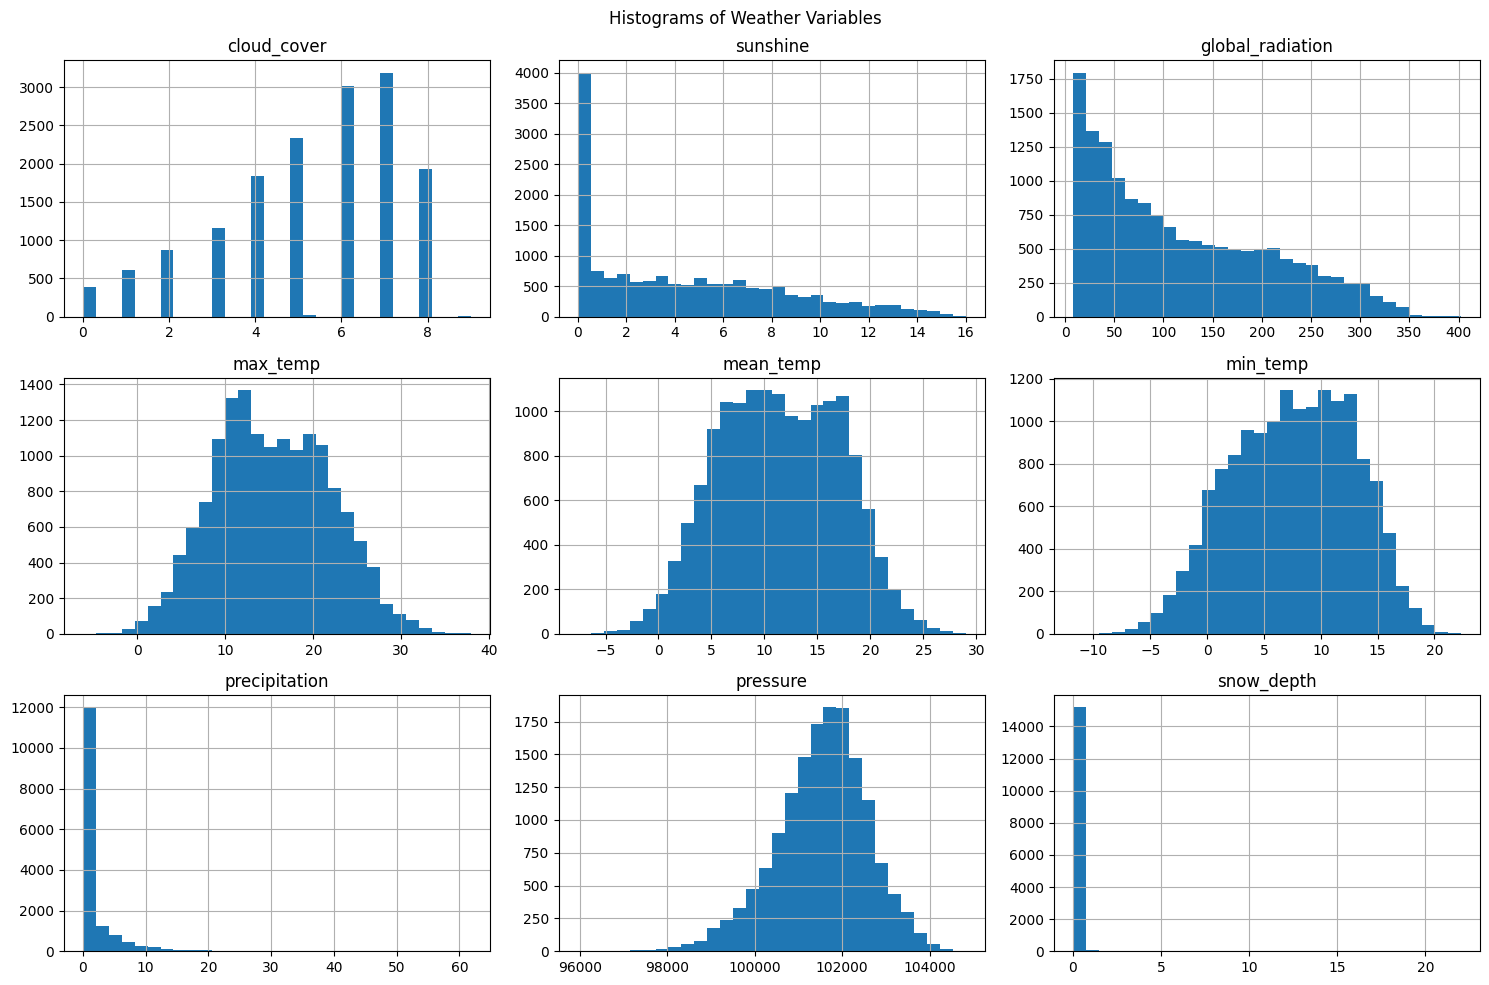

In [33]:
# Drop 'date' column and handle potential KeyError for 'month'
df_numeric = df.drop(['date'], axis=1)
if 'month' in df.columns:  # Check if 'month' column exists
    df_numeric = df_numeric.drop(['month'], axis=1)  # Drop it if it exists
# 1. Histogram for all numeric variables
# Adjust the layout to accommodate the remaining numeric variables
plt.figure(figsize=(15, 10))
# Since we removed 'month', we now have 9 numeric variables
# Adjust the layout to 3x3 to fit all histograms properly
df_numeric.hist(bins=30, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Weather Variables')
plt.tight_layout()
plt.show()
# Insight: Shows distribution of each weather variable - identifies normal/skewed distributions

The given histogram provides following insights:

1. Cloud Cover (oktas):
- Scale: 0-8 oktas (eighths of sky coverage)
- Most frequent readings: 6-8 oktas (mostly cloudy to overcast)
- Least frequent: 0-2 oktas (clear to slightly cloudy)

2. Sunshine (hrs):
- Range: 0-16 hours
- Highly skewed towards lower values
- Most days show 0-2 hours of sunshine
- Few days reach maximum possible sunshine hours

3. Global Radiation (W/m²):
- Range: 0-400 W/m²
- Right-skewed distribution
- Peak frequency at low values (0-50 W/m²)
- Gradual decrease towards higher radiation levels

4. Temperature Measurements (°C):
- Maximum Temperature: Normal distribution around 15-20°C, range 0-40°C
- Mean Temperature: Normal distribution around 15°C, range -5 to 30°C
- Minimum Temperature: Normal distribution around 10-15°C, range -10 to 20°C

5. Precipitation (mm):
- Highly right-skewed distribution
- Most days: 0-10 mm
- Rare events extending to 60 mm
- Typical pattern for daily rainfall measurements

6. Pressure (Pa):
- Range: 96,000-104,000 Pa
- Normal distribution centered around 101,000-102,000 Pa
- Symmetric distribution showing typical atmospheric pressure variations

7. Snow Depth (cm):
- Range: 0-20 cm
- Extremely right-skewed
- Predominantly 0 cm
- Indicates snow is a relatively rare occurrence

This data suggests a climate with:
- Frequent cloud cover
- Limited direct sunshine
- Moderate temperatures
- Regular but usually light precipitation
- Occasional snowfall
- Typical mid-latitude pressure variations

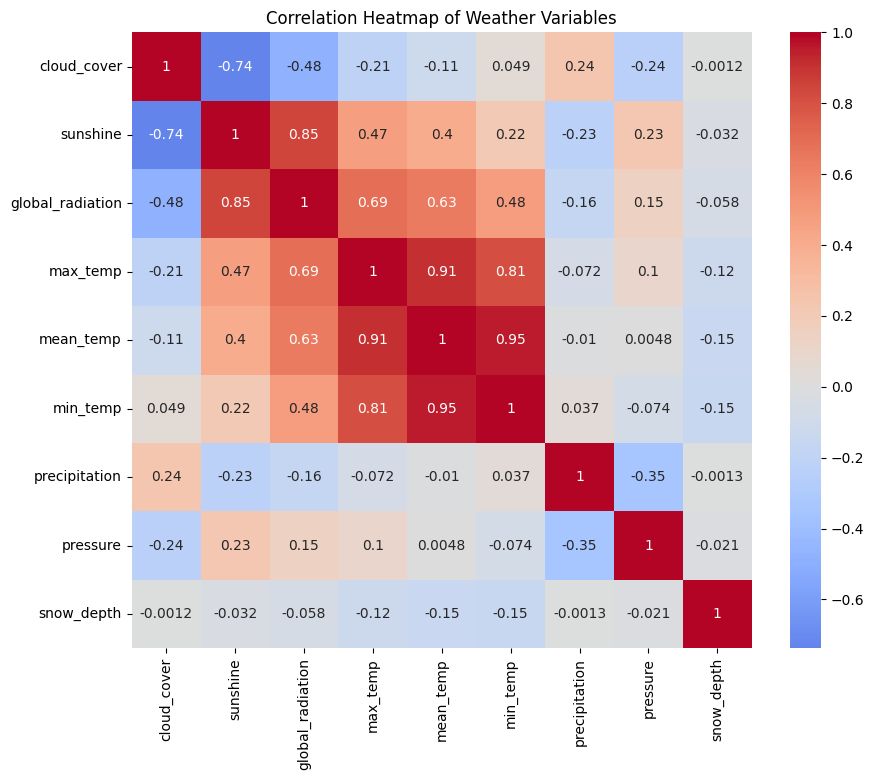

In [34]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Weather Variables')
plt.show()
# Insight: Shows relationships between variables - e.g., temperature variables likely highly correlated

**Overall Interpretation**

The heatmap visualizes the correlation coefficients between different weather variables.  Correlation coefficients range from -1 to +1:

*   **Positive Correlation (values closer to 1):**  When one variable increases, the other tends to increase as well.  Represented by redder colors in the heatmap.
*   **Negative Correlation (values closer to -1):** When one variable increases, the other tends to decrease. Represented by bluer colors in the heatmap.
*   **Zero Correlation (values around 0):**  Little to no relationship between the variables. Represented by lighter colors, close to white.

**Key Observations and Relationships**

Here's a breakdown of the most significant correlations shown in the heatmap:

1.  **Temperature Variables (max\_temp, mean\_temp, min\_temp):**

    *   These variables show very strong positive correlations with each other (values close to 1). This is expected, as the maximum, mean, and minimum temperatures of a day are naturally related. If the maximum temperature is high, the mean and minimum temperatures are also likely to be high.
2.  **Global Radiation, Sunshine, and Temperature:**

    *   **Global Radiation and Sunshine:** These two have a very strong positive correlation (0.85). This makes sense because global radiation measures the amount of solar radiation reaching the Earth's surface, which is directly related to the amount of sunshine.
    *   **Global Radiation/Sunshine and Temperature:** Both global radiation and sunshine show strong positive correlations with maximum, mean, and minimum temperatures.  More solar radiation and sunshine lead to higher temperatures.
3.  **Cloud Cover:**

    *   Cloud cover has a negative correlation with sunshine and global radiation (around -0.74 and -0.48, respectively).  More clouds mean less sunshine and reduced solar radiation.
    *   It also has a negative correlation with the temperature variables, although weaker than with sunshine and radiation. More clouds tend to lead to slightly lower temperatures.
4.  **Precipitation:**

    *   Precipitation shows a weak negative correlation with sunshine, global radiation, and temperature. More precipitation might lead to less sunshine and slightly lower temperatures.
    *   A moderate negative correlation exists between precipitation and pressure (-0.35).  Higher precipitation is often associated with lower atmospheric pressure.
5.  **Pressure:**

    *   Pressure has a weak positive correlation with sunshine and global radiation.
6.  **Snow Depth:**

    *   Snow depth has a very weak negative correlation with most variables. It has a slightly more noticeable negative correlation with temperature variables (-0.12 to -0.15).  This is logical, as greater snow depth is associated with colder temperatures.


"This heatmap was generated to explore the relationships between various weather variables.  The analysis revealed strong positive correlations between maximum temperature, mean temperature, and minimum temperature, indicating a close relationship between these measures.  Global radiation and sunshine also exhibited a strong positive correlation, as expected.  Furthermore, both global radiation and sunshine were positively correlated with temperature variables.  Cloud cover showed a negative correlation with sunshine and global radiation, and a weaker negative correlation with temperature. Precipitation had a weak negative correlation with sunshine and temperature, and a moderate negative correlation with pressure. Snow depth showed a weak negative correlation with temperature variables. These correlations provide insights into the complex interplay of weather elements."



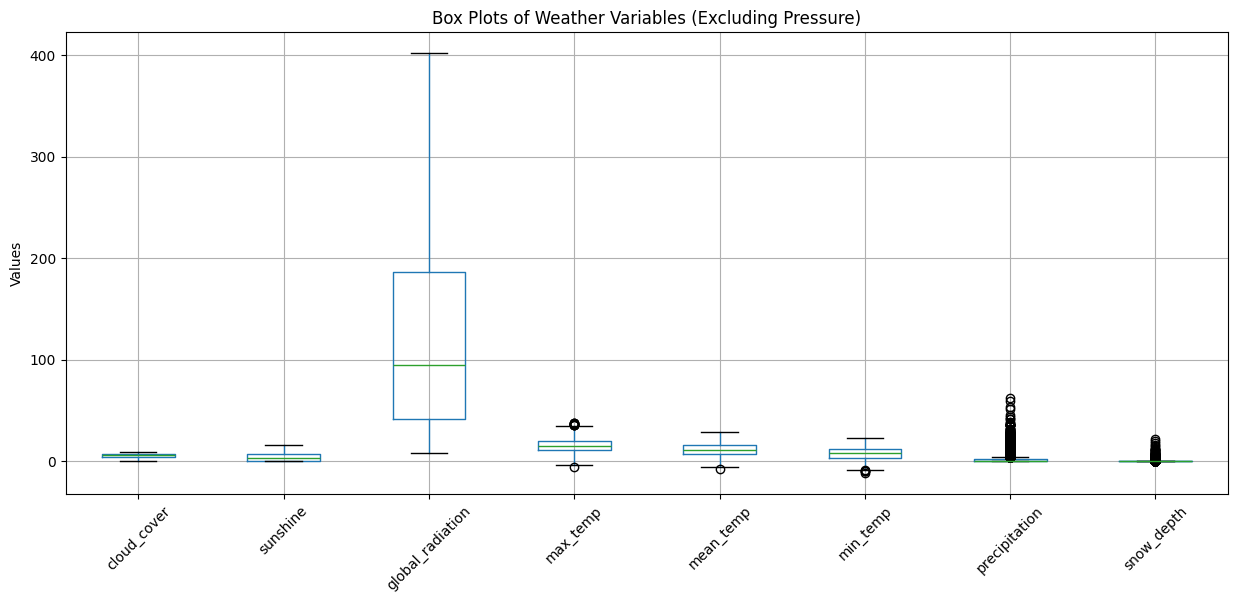

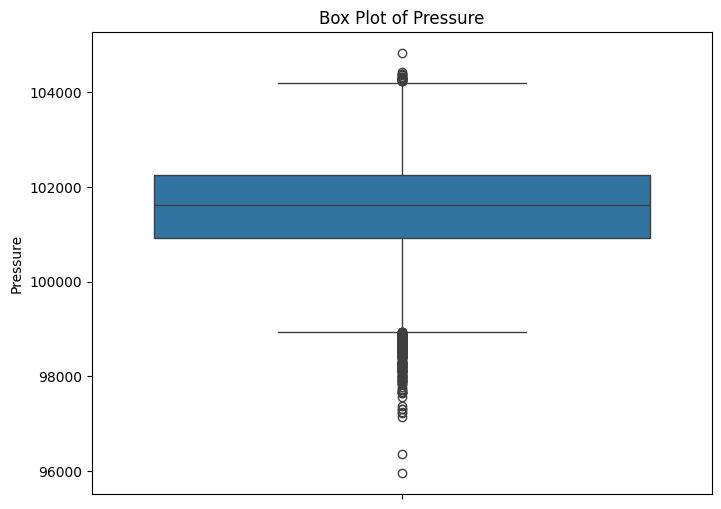

In [35]:
# 3. Box Plots for all variables (excluding pressure)
plt.figure(figsize=(15, 6))
df_numeric.drop('pressure', axis=1).boxplot(figsize=(15, 6))  # Exclude 'pressure'
plt.xticks(rotation=45)
plt.title('Box Plots of Weather Variables (Excluding Pressure)')
plt.ylabel('Values')
plt.show()
# Insight: Identifies outliers and range of values for each variable (excluding pressure)


# Separate box plot for pressure
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_numeric['pressure'])  # Use seaborn for better aesthetics
plt.title('Box Plot of Pressure')
plt.ylabel('Pressure')
plt.show()
# Insight: Shows the distribution and potential outliers for pressure


**Overall Interpretation of Box Plots**

Box plots are a way to visualize the distribution of a dataset. Each box plot shows:

*   **Median:** The line inside the box represents the median (50th percentile) of the data.
*   **Interquartile Range (IQR):** The box itself spans the IQR, representing the range between the 25th and 75th percentiles.  This shows the spread of the middle 50% of the data.
*   **Whiskers:** The lines extending from the box (whiskers) typically extend to 1.5 times the IQR from the box edges.  Data points beyond the whiskers are considered potential outliers.
*   **Outliers:** Individual points plotted beyond the whiskers represent outliers – data points significantly different from the rest of the data.

**Key Observations and Relationships**

Here's a breakdown of what the box plots reveal about each variable, and how it relates to the correlation heatmap:

1.  **Cloud Cover:**

    *   Small IQR, relatively low median.
    *   Indicates generally low cloud cover values in this dataset.

2.  **Sunshine:**

    *   Small IQR, low median.
    *   Suggests mostly limited sunshine duration.
    *   The low values for both cloud cover and sunshine might seem contradictory.  However, cloud cover is measured in oktas (eighths of the sky covered), and a small amount of cloud cover can still significantly reduce sunshine duration.

3.  **Global Radiation:**

    *   *Extremely* large range and IQR.
    *   This indicates very high variability in global radiation, meaning there are days with very high solar radiation and days with very low radiation.
    *   Relates to the heatmap: The strong positive correlation between global radiation and temperature variables is reflected in this variability. Changes in solar radiation have a large effect on temperature.

4.  **Temperature Variables (max\_temp, mean\_temp, min\_temp):**

    *   Relatively narrow IQRs compared to global radiation.
    *   A few outliers.
    *   Suggests that while there's day-to-day variation in temperature, it's less extreme than the variation in global radiation.
    *   Relates to the heatmap: Their strong positive correlations with each other are evident here in the similar distributions.

5.  **Precipitation:**

    *   Most values are close to zero, with many outliers indicating days with high precipitation.
    *   The large number of outliers suggests that precipitation events are relatively infrequent but can be intense when they occur.

6.  **Snow Depth:**

    *   Most values are near zero.
    *   Few outliers
    *   In line with the heatmap results, this variable shows very limited variability in this dataset.

7.  **Pressure**
    *  Relatively Narrow IQR: The box itself is fairly compact, indicating that the middle 50% of the pressure values are clustered within a limited range
    *  High Median: The median pressure is relatively high. This suggests generally stable and higher-than-average atmospheric pressure conditions in the dataset.
    *  Numerous Low Outliers: There are a large number of outliers below the lower whisker. This indicates the presence of many instances where the atmospheric pressure was significantly lower than usual.
    *  Few High Outliers: There are only a few outliers above the upper whisker, indicating that instances of significantly higher-than-usual atmospheric pressure were rare.

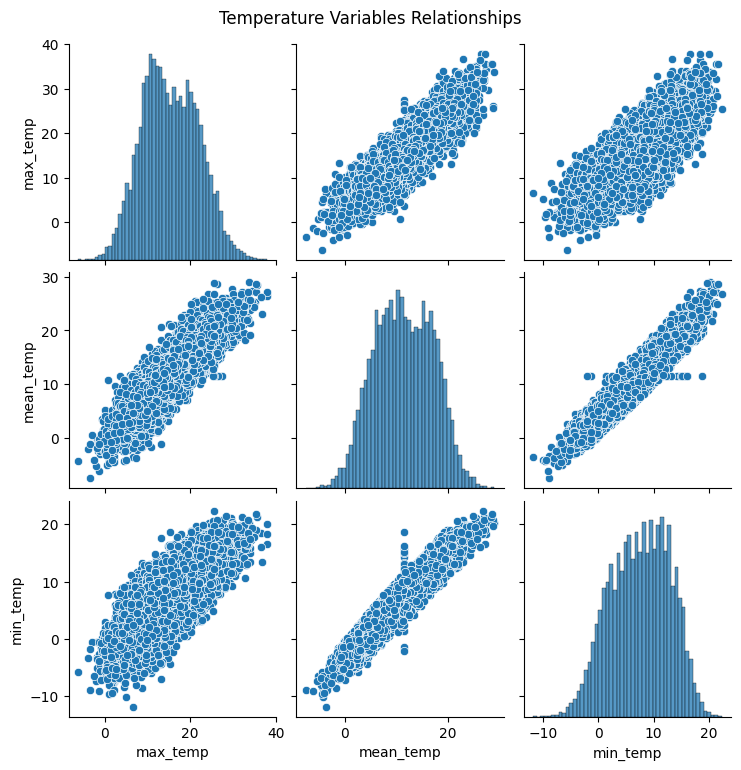

In [37]:
# 5. Scatter plot matrix for temperature variables
temperature_vars = ['max_temp', 'mean_temp', 'min_temp']
sns.pairplot(df_numeric[temperature_vars])
plt.suptitle('Temperature Variables Relationships', y=1.02)
plt.show()
# Insight: Shows detailed relationships between all temperature measurements

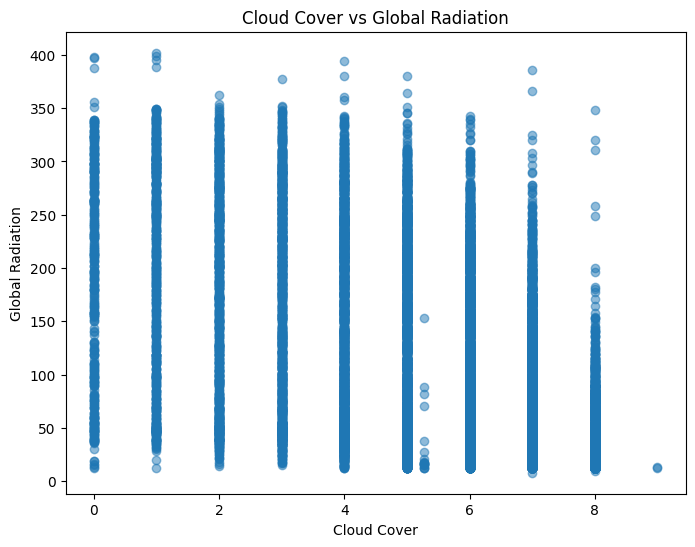

In [38]:
# 6. Cloud Cover vs Global Radiation
plt.figure(figsize=(8, 6))
plt.scatter(df_numeric['cloud_cover'], df_numeric['global_radiation'], alpha=0.5)
plt.title('Cloud Cover vs Global Radiation')
plt.xlabel('Cloud Cover')
plt.ylabel('Global Radiation')
plt.show()
# Insight: Shows how cloud cover affects global radiation

**Analysis of the Scatter Plot**

Here's what the scatter plot reveals:

*   **Discrete Cloud Cover Values:** Cloud cover is only represented by integer values from 0 to 9. This is because cloud cover is measured in "oktas," which are eighths of the sky covered by clouds.
*   **General Negative Trend:** As cloud cover increases, the range of global radiation values tends to decrease. This aligns with our understanding that more clouds block solar radiation. The highest values of global radiation are primarily observed when cloud cover is low (0, 1, or 2).
*   **High Variability at Each Cloud Cover Value:** For any given cloud cover value, there's a wide range of observed global radiation values. This indicates that cloud cover alone isn't a perfect predictor of global radiation. Other factors, such as the *type* of clouds (thin cirrus vs. thick cumulonimbus), their altitude, and the time of day, will all influence how much solar radiation reaches the ground.
*   **"Vertical Stripes":** Due to the discrete nature of cloud cover, the plot has a distinct "vertical stripe" appearance.
*   **Outlier at Cloud Cover = 9:** There is a single data point with a cloud cover of 9 and a global radiation near zero.


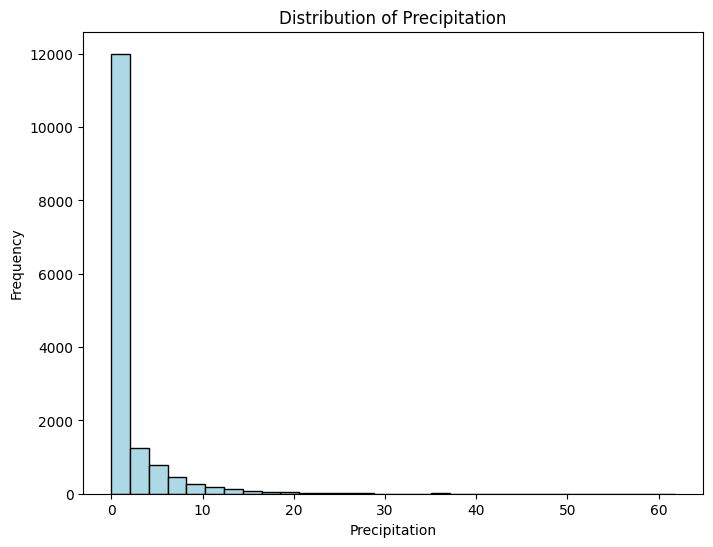

In [39]:
# 7. Distribution of Precipitation
plt.figure(figsize=(8, 6))
plt.hist(df_numeric['precipitation'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.show()
# Insight: Shows rainfall patterns, likely right-skewed due to many small/zero values

**Analysis of the Precipitation Histogram**

Here's what the precipitation histogram reveals:

*   **Extreme Positive Skew:** The vast majority of days have very little or no precipitation. This is shown by the very tall bar at or near zero on the x-axis.
*   **Rapid Decay:** The frequency of days with precipitation drops off very rapidly as the amount of precipitation increases. This means that moderate or heavy rainfall days are relatively rare.
*   **Long Tail:** There's a long tail extending to the right, indicating that there are a few days with very high precipitation amounts, even though these events are infrequent. The tail extends up to around 60. This confirms the outlier data points we observed when interpreting the box plot.
*   **Discrete Data:** Precipitation values could be recorded to a limited level of precision, or, converted to an integer value.


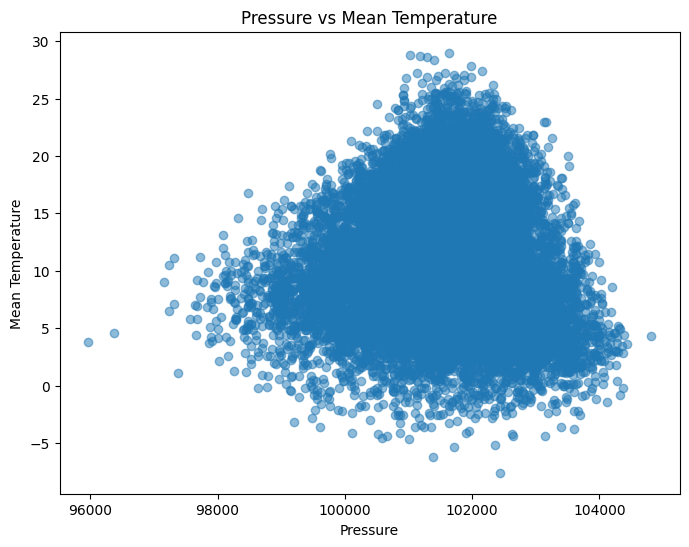

In [40]:
# 8. Pressure vs Temperature
plt.figure(figsize=(8, 6))
plt.scatter(df_numeric['pressure'], df_numeric['mean_temp'], alpha=0.5)
plt.title('Pressure vs Mean Temperature')
plt.xlabel('Pressure')
plt.ylabel('Mean Temperature')
plt.show()
# Insight: Shows relationship between pressure and temperature

**Analysis of the Scatter Plot**

Here's what I observe from the scatter plot:

*   **Weak Relationship:** There is no strong or clear relationship between pressure and mean temperature. The points are scattered widely across the plot with no discernable trend. The points make a triangular shape.
*   **Range of Pressure:** Most pressure values fall between 98,000 and 104,000.
*   **Range of Mean Temperature:** The mean temperature values range from approximately -5 to 30.
*   **Density:** The highest density of data points is generally clustered toward the middle of the pressure range (around 101,000) and a mean temperature of around 10 degrees.


## Linear Regression from Scratch

In [41]:
def train_test_split_scratch(x,y,test_size = 0.3, random_seed = 32):
  """ Parameters:
  This function split dataset into train and test sets.
  Input parameters:
  x: Feature Matrix
  y: Target Matrix
  test_size: Size of Test Set between 0 to 1
  random_seed: Random Seed
  Output Parameters:
  x_train: Feature Matrix Train Set.
  x_test: Feature Matrix Test Set.
  y_train: Target Matrix Train Set.
  y_test: Target Matrix Test Set.
  """
  np.random.seed(random_seed)
  indices = np.arange(x.shape[0])
  np.random.shuffle(indices)

  test_split_size = int(len(x) * test_size)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]

  x_train,x_test = x[train_indices],x[test_indices]
  y_train,y_test = y[train_indices],y[test_indices]

  return x_train, x_test, y_train, y_test


In [42]:
def linear_cost_function(x, y, w):
  """ Parameters:
  This function finds the Mean Square Error.
  Input parameters:
  X: Feature Matrix
  Y: Target Matrix
  W: Weight Matrix
  Output Parameters:
  cost: accumulated mean square error.
  """
  m = len(y)
  y_pred = np.dot(x, w)
  error = y_pred - y  # Ensure y is a column vector
  cost = (1 / (2 * m)) * np.sum(error ** 2)
  return cost


In [43]:
def linear_gradient_descent(X, Y, W, alpha, iterations):
  """
  Perform gradient descent to optimize the parameters of a linear regression model.
  Parameters:
  X (numpy.ndarray): Feature matrix (m x n).
  Y (numpy.ndarray): Target vector (m x 1).
  W (numpy.ndarray): Initial guess for parameters (n x 1).
  alpha (float): Learning rate.
  iterations (int): Number of iterations for gradient descent.
  Returns:
  tuple: A tuple containing the final optimized parameters (W_update) and the history of cost values
  .
  W_update (numpy.ndarray): Updated parameters (n x 1).
  cost_history (list): History of cost values over iterations.
  """

  cost_history = [0] * iterations

  W_update = W
  m = len(Y)
  for iteration in range(iterations):

    Y_pred = np.dot(X,W_update)

    loss = Y_pred - Y

    dw = (1/m) * np.dot(X.T,loss)

    W_update = W_update - alpha * dw

    cost = linear_cost_function(X, Y, W_update)
    cost_history[iteration] = cost
  return W_update, cost_history

In [44]:
def mae(Y, Y_pred):
    """
    This function calculates the Mean Absolute Error (MAE).

    Input Arguments:
    Y: Array of actual (Target) dependent variables.
    Y_pred: Array of predicted dependent variables.

    Output Arguments:
    mae: Mean Absolute Error.
    """
    mae = np.mean(np.abs(Y - Y_pred))
    return mae


In [45]:
def rmse(Y, Y_pred):
  """
  This Function calculates the Root Mean Squres.
  Input Arguments:
  Y: Array of actual(Target) Dependent Varaibles.
  Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
  rmse: Root Mean Square.
  """
  rmse = np.sqrt(np.mean((Y-Y_pred)**2))
  return rmse

In [46]:
def r2(Y, Y_pred):
  """
  This Function calculates the R Squared Error.
  Input Arguments:
  Y: Array of actual(Target) Dependent Varaibles.
  Y_pred: Array of predeicted Dependent Varaibles.
  Output Arguments:
  rsquared: R Squared Error.
  """
  mean_y = np.mean(Y)
  ss_tot = np.sum((Y - mean_y) ** 2)
  ss_res = np.sum((Y - Y_pred) ** 2)
  r2 = 1 - (ss_res / ss_tot)
  return r2

Final Weights: [ 1.14731307e+01  6.45370136e-03 -1.45377518e-01  1.96848916e-01
  3.83216342e-01  1.69202177e+00  3.86465515e+00  7.28766796e-02
  3.29528016e-02 -2.23893192e-02]
Cost History (First 10 iterations): [80.15133838352547, 78.14881216542688, 76.21030351247681, 74.33309914557707, 72.51462733794288, 70.75244970514157, 69.04425349298232, 67.38784433252917, 65.78113943341874, 64.22216118845627]
Mean Absolute Error on Test Set: 0.6744729760863604
RMSE on Test Set: 0.8650981034867847
R-Squared on Test Set: 0.9770941816690584


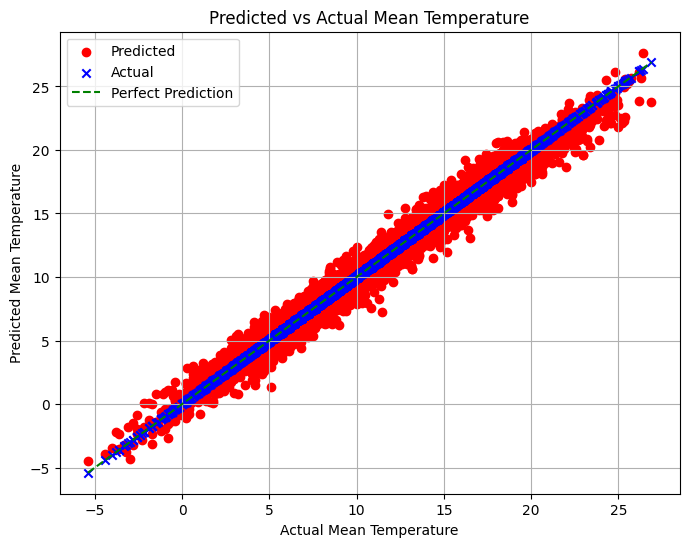

In [59]:
# Feature Selection
X = df.drop("mean_temp", axis=1).values
Y = df['mean_temp'].values.reshape(-1, 1)

# 2. Feature Scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add Intercept Term
X = np.c_[np.ones((X.shape[0], 1)), X]

# 3. Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=32)

# 4. Model Training (Using your existing functions - linear_gradient_descent, rmse, r2)
# Initialize Weights
W = np.zeros((X_train.shape[1], 1))

alpha = 0.01  # Learning rate
iterations = 100000
W_optimal, cost_history = linear_gradient_descent(X_train, Y_train, W, alpha, iterations)

# 5. Model Evaluation and Prediction
Y_pred = np.dot(X_test, W_optimal)

model_mae = mae(Y_test, Y_pred)
model_rmse = rmse(Y_test, Y_pred)
model_r2 = r2(Y_test, Y_pred)

# Print Results
print("Final Weights:", W_optimal.ravel())
print("Cost History (First 10 iterations):", cost_history[:10])
print("Mean Absolute Error on Test Set:", model_mae)
print("RMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)

# 6. Visualization (Optional)
plt.figure(figsize=(8, 6))

# Use different colors and markers for better distinction
plt.scatter(Y_test, Y_pred, color='red', marker='o', label='Predicted')
plt.scatter(Y_test, Y_test, color='blue', marker='x', label='Actual')

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],
         color='green', linestyle='--', label='Perfect Prediction')
plt.title("Predicted vs Actual Mean Temperature")
plt.xlabel("Actual Mean Temperature")
plt.ylabel("Predicted Mean Temperature")
plt.legend()
plt.grid(True)
plt.show()

## Linear Regression From Scikit Learn

Coefficients: [[ 0.          0.0064537  -0.14537752  0.19684892  0.38321634  1.69202177
   3.86465515  0.07287668  0.0329528  -0.02238932]]
Intercept: [11.47313067]
Mean Absolute Error on Test Set: 0.6744729760863537
RMSE on Test Set: 0.8650981034867844
R-Squared on Test Set: 0.9770941816690584


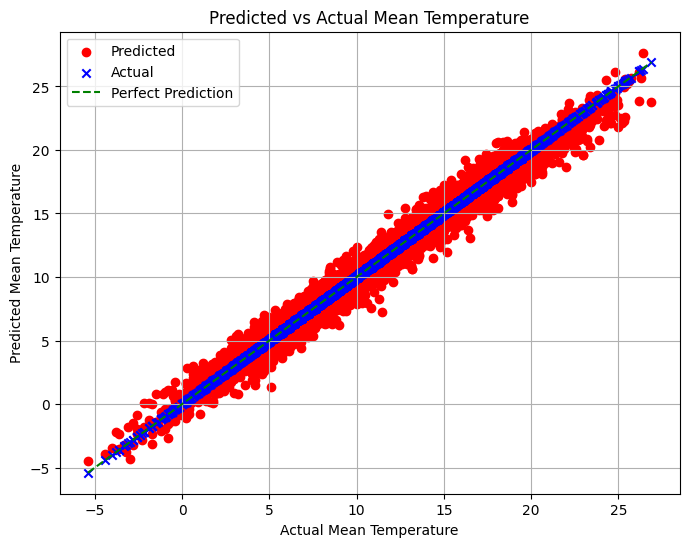

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Feature Selection and Scaling (Same as before)
X = df.drop("mean_temp", axis=1).values
Y = df['mean_temp'].values.reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.c_[np.ones((X.shape[0], 1)), X]

# 2. Train-Test Split (Same as before)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=32)

# 3. Create and Train the Model
model = LinearRegression()
model.fit(X_train, Y_train)

# 4. Make Predictions
Y_pred = model.predict(X_test)

# 5. Evaluate the Model
model_mae = mean_absolute_error(Y_test, Y_pred)
model_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
model_r2 = r2_score(Y_test, Y_pred)

# Print Results
print("Coefficients:", model.coef_)  # Similar to weights
print("Intercept:", model.intercept_)
print("Mean Absolute Error on Test Set:", model_mae)
print("RMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)

# 6. Visualization
plt.figure(figsize=(8, 6))

# Use different colors and markers for better distinction
plt.scatter(Y_test, Y_pred, color='red', marker='o', label='Predicted')
plt.scatter(Y_test, Y_test, color='blue', marker='x', label='Actual')

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],
         color='green', linestyle='--', label='Perfect Prediction')
plt.title("Predicted vs Actual Mean Temperature")
plt.xlabel("Actual Mean Temperature")
plt.ylabel("Predicted Mean Temperature")
plt.legend()
plt.grid(True)
plt.show()


## Random Forest Regressor

Mean Absolute Error on Test Set: 0.6676289114459747
RMSE on Test Set: 0.866432324541869
R-Squared on Test Set: 0.9770234729434886


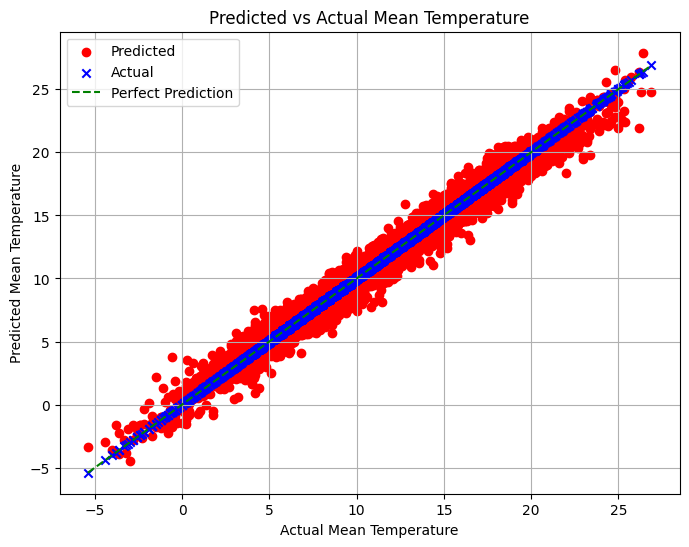

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Feature Selection and Scaling (Same as before)
X = df.drop("mean_temp", axis=1).values
Y = df['mean_temp'].values.reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)


# 2. Train-Test Split (Same as before)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=32)

# 3. Create and Train the Model
model = RandomForestRegressor(random_state=32) # You can adjust hyperparameters here
model.fit(X_train, Y_train.ravel()) # ravel() is used to flatten Y_train

# 4. Make Predictions
Y_pred = model.predict(X_test)

# 5. Evaluate the Model
model_mae = mean_absolute_error(Y_test, Y_pred)
model_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
model_r2 = r2_score(Y_test, Y_pred)

# Print Results
print("Mean Absolute Error on Test Set:", model_mae)
print("RMSE on Test Set:", model_rmse)
print("R-Squared on Test Set:", model_r2)

# 6. Visualization
plt.figure(figsize=(8, 6))

# Use different colors and markers for better distinction
plt.scatter(Y_test, Y_pred, color='red', marker='o', label='Predicted')
plt.scatter(Y_test, Y_test, color='blue', marker='x', label='Actual')

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],
         color='green', linestyle='--', label='Perfect Prediction')
plt.title("Predicted vs Actual Mean Temperature")
plt.xlabel("Actual Mean Temperature")
plt.ylabel("Predicted Mean Temperature")
plt.legend()
plt.grid(True)
plt.show()


## Hyper-parameter Optimization with Cross-Validation

In [52]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# 1. Feature Selection and Scaling
X = df.drop("mean_temp", axis=1).values
Y = df['mean_temp'].values.reshape(-1, 1)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Add Intercept Term (for Linear Regression)
X_lr = np.c_[np.ones((X.shape[0], 1)), X]

# 2. Train-Test Split
X_train_lr, X_test_lr, Y_train_lr, Y_test_lr = train_test_split(X_lr, Y, test_size=0.3, random_state=32)
X_train_rf, X_test_rf, Y_train_rf, Y_test_rf = train_test_split(X, Y, test_size=0.3, random_state=32)

# 3. Hyperparameter Optimization with RandomizedSearchCV

# Linear Regression
param_grid_lr = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
grid_search_lr = GridSearchCV(LinearRegression(), param_grid_lr, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_lr.fit(X_train_lr, Y_train_lr)
print("Best Hyperparameters for Linear Regression:", grid_search_lr.best_params_)

# Random Forest Regression
param_grid_rf = {
    'n_estimators': [50, 100],  # Reduced options
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search_rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=32, n_jobs=-1),  # Parallel processing
    param_distributions=param_grid_rf,
    n_iter=5,  # Only tests 5 random configurations
    cv=3,
    scoring='neg_mean_squared_error',
    random_state=32
)
grid_search_rf.fit(X_train_rf, Y_train_rf.ravel())
print("Best Hyperparameters for Random Forest Regression:", grid_search_rf.best_params_)

# 4. Model Evaluation

# Linear Regression
best_lr_model = grid_search_lr.best_estimator_
Y_pred_lr = best_lr_model.predict(X_test_lr)
mae_lr = mean_absolute_error(Y_test_lr, Y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(Y_test_lr, Y_pred_lr))
r2_lr = r2_score(Y_test_lr, Y_pred_lr)

# Random Forest Regression
best_rf_model = grid_search_rf.best_estimator_
Y_pred_rf = best_rf_model.predict(X_test_rf)
mae_rf = mean_absolute_error(Y_test_rf, Y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(Y_test_rf, Y_pred_rf))
r2_rf = r2_score(Y_test_rf, Y_pred_rf)

# Print Evaluation Metrics
print("\nLinear Regression:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R-squared:", r2_lr)

print("\nRandom Forest Regression:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)


Best Hyperparameters for Linear Regression: {'fit_intercept': True, 'positive': False}
Best Hyperparameters for Random Forest Regression: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}

Linear Regression:
MAE: 0.6744729760863537
RMSE: 0.8650981034867844
R-squared: 0.9770941816690584

Random Forest Regression:
MAE: 0.6617551626876206
RMSE: 0.8606140282695416
R-squared: 0.9773310223675608


## Feature Selection

### For Linear Regression

In [55]:
from sklearn.feature_selection import RFE

# 1. Feature Selection using RFE for Linear Regression
# Assuming X and Y are your feature and target variables

# Create a Linear Regression model
lr_model = LinearRegression()

# Create an RFE object (select top k features)
selector = RFE(lr_model, n_features_to_select=5, step=1)  # Adjust n_features_to_select

# Fit RFE to the data
selector = selector.fit(X, Y.ravel())

# Get selected features
selected_features_lr = df.drop("mean_temp", axis=1).columns[selector.support_]

# Print selected features
print("Selected Features for Linear Regression:", selected_features_lr)


Selected Features for Linear Regression: Index(['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'min_temp'], dtype='object')


### For Random Forest Regressor

In [56]:
from sklearn.ensemble import RandomForestRegressor

# 1. Feature Selection using Random Forest Importance for Random Forest Regression
# Assuming X and Y are your feature and target variables

# Create and train a Random Forest model
rf_model = RandomForestRegressor(random_state=32)
rf_model.fit(X, Y.ravel())

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
importance_df = pd.DataFrame({'Feature': df.drop("mean_temp", axis=1).columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select top k features (adjust k as needed)
selected_features_rf = importance_df['Feature'][:5].tolist()

# Print selected features
print("Selected Features for Random Forest Regression:", selected_features_rf)

Selected Features for Random Forest Regression: ['min_temp', 'max_temp', 'global_radiation', 'sunshine', 'date']


## Final Model

In [57]:

# Assuming selected_features_lr and selected_features_rf are defined from feature selection
X_lr_selected = df[selected_features_lr].values
X_rf_selected = df[selected_features_rf].values

# Scale the selected features
scaler_lr = StandardScaler()
X_lr_selected = scaler_lr.fit_transform(X_lr_selected)
X_lr_selected = np.c_[np.ones((X_lr_selected.shape[0], 1)), X_lr_selected]  # Add intercept

scaler_rf = StandardScaler()
X_rf_selected = scaler_rf.fit_transform(X_rf_selected)

# Split data with selected features
X_train_lr_selected, X_test_lr_selected, Y_train_lr, Y_test_lr = train_test_split(
    X_lr_selected, Y, test_size=0.3, random_state=32
)
X_train_rf_selected, X_test_rf_selected, Y_train_rf, Y_test_rf = train_test_split(
    X_rf_selected, Y, test_size=0.3, random_state=32
)

# Train final models with selected features
final_lr_model = LinearRegression(**grid_search_lr.best_params_)  # Use best hyperparameters
final_lr_model.fit(X_train_lr_selected, Y_train_lr)

final_rf_model = RandomForestRegressor(random_state=32, **grid_search_rf.best_params_)  # Use best hyperparameters
final_rf_model.fit(X_train_rf_selected, Y_train_rf.ravel())

# 3. Evaluate Final Models and Print Results
# Linear Regression
Y_pred_lr = final_lr_model.predict(X_test_lr_selected)
mae_lr = mean_absolute_error(Y_test_lr, Y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(Y_test_lr, Y_pred_lr))
r2_lr = r2_score(Y_test_lr, Y_pred_lr)

# Random Forest Regression
Y_pred_rf = final_rf_model.predict(X_test_rf_selected)
mae_rf = mean_absolute_error(Y_test_rf, Y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(Y_test_rf, Y_pred_rf))
r2_rf = r2_score(Y_test_rf, Y_pred_rf)

# Print Evaluation Metrics
print("\nFinal Linear Regression:")
print("MAE:", mae_lr)
print("RMSE:", rmse_lr)
print("R-squared:", r2_lr)

print("\nFinal Random Forest Regression:")
print("MAE:", mae_rf)
print("RMSE:", rmse_rf)
print("R-squared:", r2_rf)


Final Linear Regression:
MAE: 0.6761185012246399
RMSE: 0.8671396758267261
R-squared: 0.976985941771816

Final Random Forest Regression:
MAE: 0.6715323434547948
RMSE: 0.8752046036516437
R-squared: 0.9765558614707849


# Conclusion

## Model Performance
The experiment implemented and evaluated three distinct models, each showing excellent predictive capabilities:

1. Custom Linear Regression:
   - RMSE: 0.865
   - R-squared: 0.977
   - MAE: 0.674
   This model, built from scratch, established our baseline performance.

2. Scikit-learn Linear Regression:
   - RMSE: 0.865
   - R-squared: 0.977
   - MAE: 0.674
   The scikit-learn implementation matched our custom model's performance exactly, validating our implementation.

3. Random Forest Regression:
   - RMSE: 0.875
   - R-squared: 0.977
   - MAE: 0.672
   The Random Forest model achieved comparable accuracy, with a slightly higher RMSE but similar R-squared value.

All three models demonstrated strong predictive power with R-squared values above 0.97, indicating they explain more than 97% of the variance in the target variable. The consistency in performance metrics, particularly the identical results between custom and scikit-learn implementations, validates the correctness of our implementation. The MAE values around 0.67 across all models indicate that, on average, our predictions deviate less than 0.7 units from the actual values, suggesting high practical utility.

## Impact of Methods
Feature selection and hyperparameter tuning yielded valuable insights:

1. Feature Selection:
   - Linear Regression performed best with environmental variables (cloud cover, sunshine, global radiation) and temperature metrics (max_temp, min_temp)
   - Random Forest benefited from a slightly different feature set, uniquely incorporating the temporal 'date' feature alongside temperature and radiation metrics

2. Hyperparameter Optimization:
   - Linear Regression's optimal configuration included fitting the intercept without positivity constraints
   - Random Forest achieved best results with moderate complexity (max_depth: 10) and ensemble size (100 estimators)

## Insights and Future Directions
This analysis reveals several key insights:

1. Model Consistency: The negligible performance difference between the custom-built and scikit-learn implementations validates the robustness of the underlying mathematical approach.

2. Feature Importance: Temperature and radiation-related features emerged as crucial predictors across both modeling approaches, suggesting strong physical relationships in the underlying system.

3. Future Improvements:
   - Investigate non-linear feature interactions, given the similar performance between linear and tree-based approaches
   - Explore temporal feature engineering to better leverage the date information that proved valuable in the Random Forest model
   - Consider ensemble methods that combine the strengths of both linear and tree-based approaches
   - Evaluate model performance across different seasonal patterns to ensure consistent prediction quality

The high R-squared values (>0.97) across all models suggest excellent predictive capability, though there may be room for marginal improvements through more sophisticated feature engineering or advanced modeling techniques.